### Connection


In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import getenv
from dotenv import load_dotenv
load_dotenv()
config = {
        'user':getenv('DB_USER'),
        'password': getenv('PASSWORD'),
        'host': getenv('HOST'),
        'database':getenv('DATABASE')
                                        }
cnx = mysql.connector.connect(**config)
query = """SELECT * 
        FROM  IMDB_movies """

cursor = cnx.cursor(dictionary=True)
cursor.execute(query)
df = pd.DataFrame(cursor.fetchall())
df = df.dropna()

### Movies per year

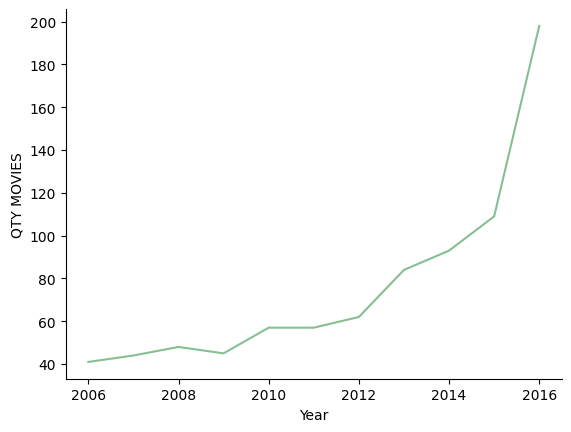

In [2]:
by_year = df.groupby('Year').count()[['Id']].rename(columns={"Id":"qty_movies"})
year_chart = by_year.plot(kind = 'line',color = '#86bf91',ylabel='QTY MOVIES',legend=False)
year_chart.spines['right'].set_visible(False)
year_chart.spines['top'].set_visible(False)




### Genres count

In [233]:
genres = df['Genre'].str.split(',')

In [234]:
count = {}
for i in genres:
    for j in i:
        if j not in count:
            count[j] = 0
        count[j]+=1

In [238]:
genres_count = {'Movie':list(count.keys()),'QTY':list(count.values())}

In [242]:
df_genres = pd.DataFrame(genres_count).set_index('Movie')

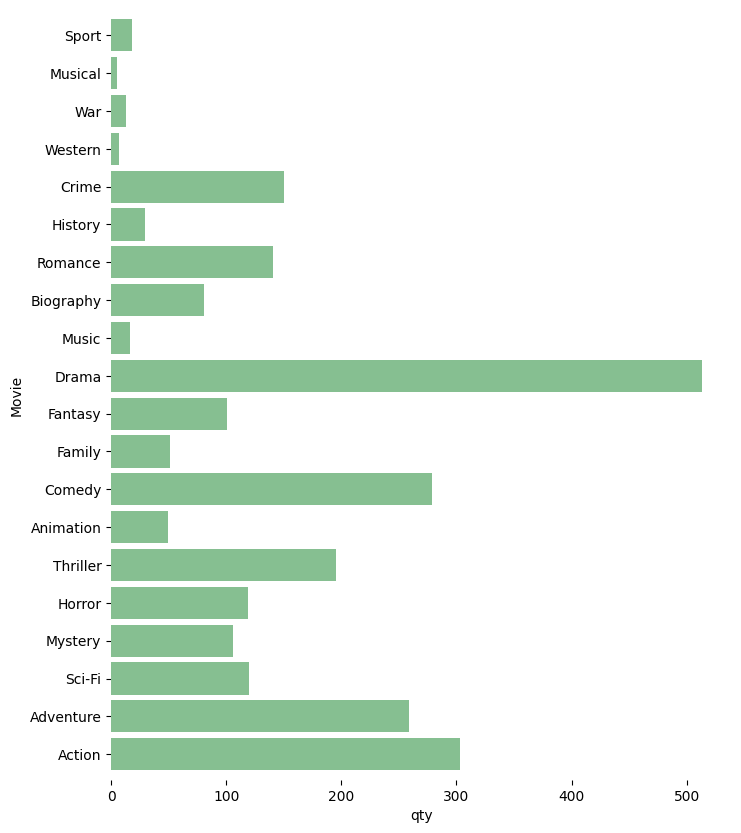

In [308]:
genre_chart = df_genres.plot(kind='barh', figsize=(8, 10), color='#86bf91', 
zorder=2, width=0.85,xlabel='qty',legend = False)
genre_chart.spines['right'].set_visible(False)
genre_chart.spines['top'].set_visible(False)
genre_chart.spines['left'].set_visible(False)
genre_chart.spines['bottom'].set_visible(False)




### TOP 10 revenue movies

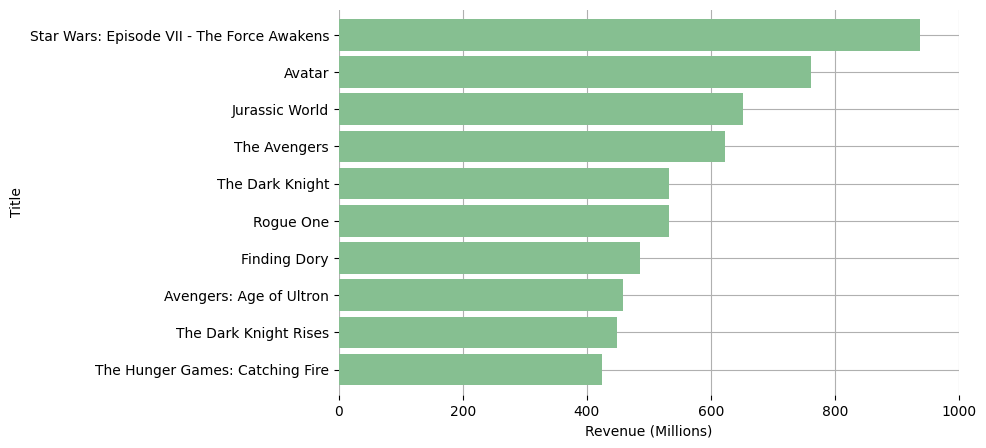

In [313]:
df['RevenueMillions'] = df['RevenueMillions'].astype(int)
top10 = df.nlargest(10,'RevenueMillions')[['Title','RevenueMillions']].set_index('Title').sort_values(by ='RevenueMillions')
top10_chart = top10.plot(kind='barh', figsize=(8, 5), color='#86bf91', 
zorder=2, width=0.85,xlabel='Revenue (Millions)',legend = False,xlim=(0,1000),grid = True)
top10_chart.spines['right'].set_visible(False)
top10_chart.spines['top'].set_visible(False)
top10_chart.spines['left'].set_visible(False)
top10_chart.spines['bottom'].set_visible(False)

### Is there any relationship between runtime movie and revenue? 

In [275]:
df['RevenueMillions'] = df['RevenueMillions'].astype(int)

In [280]:
df2 = df[['Title','Runtime','RevenueMillions']]

<AxesSubplot: xlabel='Runtime', ylabel='RevenueMillions'>

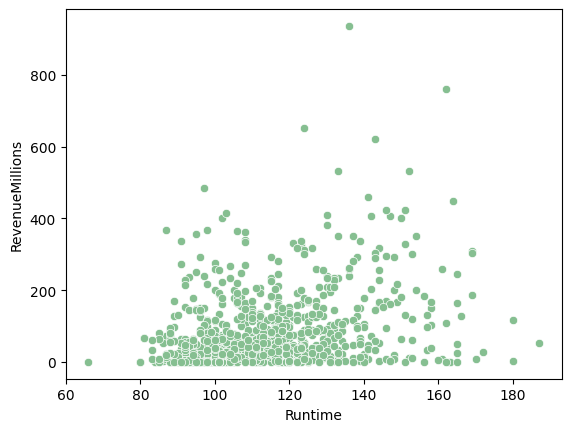

In [285]:
sns.scatterplot(x = 'Runtime',y = 'RevenueMillions',data = df2,color='#86bf91')

No, there is not. So, the hypothesis that more longer movies are more lucrative it's not truly